# baseline
### 不参与建模的特征 'os' 'osv' 'lan' 'sid'

In [2]:
import pandas as pd
test = pd.read_csv('./test1.csv')
train = pd.read_csv('./train.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
test = test.iloc[:,1:] #第一列作为索引
test

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,317625,1181,46000.0,2196.0,2.0,1080.0,CN,639,2.0,Android,8.1.0,188,1440682,1.559872e+12,7,1672223856,57,3872258917,658
1,435108,944,46003.0,2280.0,3.0,1080.0,zh-CN,704,6.0,Android,8.1.0,221,1606824,1.559739e+12,3,3767901757,23,129322164,943
2,0,1106,46000.0,0.0,0.0,0.0,NaN,39,2.0,android,5.1,1562,1774642,1.559614e+12,0,454638703,30,4226678391,411
3,451504,761,46000.0,1344.0,0.0,720.0,NaN,54,2.0,android,7.1.1,9,1742535,1.559668e+12,0,1507622951,65,3355419572,848
4,0,1001,46000.0,665.0,0.0,320.0,zh-CN,29,5.0,Android,8.1.0,4,1689686,1.559694e+12,0,4116351093,148,2644467751,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,1001,46000.0,760.0,0.0,360.0,zh-CN,29,2.0,Android,8.1.0,4,1165373,1.559957e+12,0,3162887451,126,2711576615,411
149996,0,1001,46000.0,780.0,0.0,360.0,zh-CN,29,2.0,Android,9.0.0,4,1444115,1.559863e+12,0,97238959,322,2678022183,411
149997,0,1001,46000.0,780.0,0.0,360.0,zh-CN,29,5.0,Android,8.1.0,4,1134378,1.560041e+12,0,1320118495,46,2610913319,411
149998,500925,1052,46000.0,854.0,240.0,480.0,zh-CN,249,6.0,android,4.4.2,0,1700238,1.559688e+12,2,1292986591,41,1898209327,430


In [5]:
train = train.iloc[:,1:]
train

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,6.0,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,6.0,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,0.0,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,2.0,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,2.0,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,392477,1028,46000.0,1920.0,3.0,1080.0,1,zh-CN,144,6.0,Android,7.1.2,25,1546078,1.559834e+12,7,861755946,79,140647032,373
499996,346134,1001,0.0,1424.0,0.0,720.0,0,NaN,29,2.0,android,8.1.0,0,1480612,1.559814e+12,3,1714444511,23,2745131047,525
499997,499635,761,46000.0,1280.0,0.0,720.0,0,NaN,54,6.0,android,6.0.1,9,1698442,1.559676e+12,0,3843262581,25,1326115882,810
499998,239786,917,46001.0,960.0,0.0,540.0,0,zh_CN,109,2.0,android,5.1.1,0,1331155,1.559840e+12,0,1984296118,225,1446741112,772


In [6]:
# train.info() # 字段信息
# train['lan'].value_counts()
object_cols = train.select_dtypes(include='object').columns  #['lan', 'os', 'osv', 'version', 'fea_hash'] 非数值类型转化为数值类型

# 缺失值个数 有缺失的字段：lan、osv
temp = train.isnull().sum()
temp[temp>0]

lan    183280
osv      6561
dtype: int64

In [6]:
features = train.columns.tolist()
features.remove('label')
features

['android_id',
 'apptype',
 'carrier',
 'dev_height',
 'dev_ppi',
 'dev_width',
 'lan',
 'media_id',
 'ntt',
 'os',
 'osv',
 'package',
 'sid',
 'timestamp',
 'version',
 'fea_hash',
 'location',
 'fea1_hash',
 'cus_type']

In [8]:
for feature in features:
    print(feature,train[feature].nunique())

android_id 362258
apptype 89
carrier 5
dev_height 798
dev_ppi 92
dev_width 346
lan 21
media_id 284
ntt 8
os 2
osv 154
package 1950
sid 500000
timestamp 500000
version 22
fea_hash 402980
location 332
fea1_hash 4959
cus_type 58


In [9]:
# train['fea_hash'].describe()  转化成类别类型的，该特征值太多
train['fea_hash'].map(lambda x : len(str(x))).value_counts()

10    378925
9     108904
8      11235
7        740
6         93
38        37
39        28
37        16
5         11
36         3
33         2
32         2
1          2
30         1
31         1
Name: fea_hash, dtype: int64

In [10]:
features

['android_id',
 'apptype',
 'carrier',
 'dev_height',
 'dev_ppi',
 'dev_width',
 'lan',
 'media_id',
 'ntt',
 'os',
 'osv',
 'package',
 'sid',
 'timestamp',
 'version',
 'fea_hash',
 'location',
 'fea1_hash',
 'cus_type']

In [7]:
remove_cols = [ 'os','sid']
cols = features
for col in remove_cols:
    cols.remove(col)
cols

['android_id',
 'apptype',
 'carrier',
 'dev_height',
 'dev_ppi',
 'dev_width',
 'lan',
 'media_id',
 'ntt',
 'osv',
 'package',
 'timestamp',
 'version',
 'fea_hash',
 'location',
 'fea1_hash',
 'cus_type']

In [8]:
# 使用;LGBM 训练  树模型
import lightgbm as lgb

In [9]:
# 构造特征
test_features = test[cols]
test_features['fea_hash_len'] = test_features['fea_hash'].map(lambda x : len(str(x)))
test_features['fea1_hash_len'] = test_features['fea1_hash'].map(lambda x : len(str(x)))
test_features['fea_hash'] = test_features['fea_hash'].map(lambda x : 0 if len(str(x))>16 else int(x))
test_features['fea1_hash'] = test_features['fea1_hash'].map(lambda x : 0 if len(str(x))>16 else int(x))
test_features

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,osv,package,timestamp,version,fea_hash,location,fea1_hash,cus_type,fea_hash_len,fea1_hash_len
0,317625,1181,46000.0,2196.0,2.0,1080.0,CN,639,2.0,8.1.0,188,1.559872e+12,7,1672223856,57,3872258917,658,10,10
1,435108,944,46003.0,2280.0,3.0,1080.0,zh-CN,704,6.0,8.1.0,221,1.559739e+12,3,3767901757,23,129322164,943,10,9
2,0,1106,46000.0,0.0,0.0,0.0,NaN,39,2.0,5.1,1562,1.559614e+12,0,454638703,30,4226678391,411,9,10
3,451504,761,46000.0,1344.0,0.0,720.0,NaN,54,2.0,7.1.1,9,1.559668e+12,0,1507622951,65,3355419572,848,10,10
4,0,1001,46000.0,665.0,0.0,320.0,zh-CN,29,5.0,8.1.0,4,1.559694e+12,0,4116351093,148,2644467751,411,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,1001,46000.0,760.0,0.0,360.0,zh-CN,29,2.0,8.1.0,4,1.559957e+12,0,3162887451,126,2711576615,411,10,10
149996,0,1001,46000.0,780.0,0.0,360.0,zh-CN,29,2.0,9.0.0,4,1.559863e+12,0,97238959,322,2678022183,411,8,10
149997,0,1001,46000.0,780.0,0.0,360.0,zh-CN,29,5.0,8.1.0,4,1.560041e+12,0,1320118495,46,2610913319,411,10,10
149998,500925,1052,46000.0,854.0,240.0,480.0,zh-CN,249,6.0,4.4.2,0,1.559688e+12,2,1292986591,41,1898209327,430,10,10


In [10]:
features = train[cols]
features['fea_hash_len'] = features['fea_hash'].map(lambda x : len(str(x)))
features['fea1_hash_len'] = features['fea1_hash'].map(lambda x : len(str(x)))
features['fea_hash'] = features['fea_hash'].map(lambda x : 0 if len(str(x))>16 else int(x))
features['fea1_hash'] = features['fea1_hash'].map(lambda x : 0 if len(str(x))>16 else int(x))
test_features['lan'].value_counts()

zh-CN          73046
zh              9094
cn              6136
zh_CN           3391
Zh-CN           2430
zh-cn            165
ZH                60
CN                46
tw                28
en                26
zh_CN_#Hans       11
ko                 6
zh-TW              5
en-US              2
zh-HK              2
en-GB              1
TW                 1
en_US              1
zh-US              1
in_ID              1
Name: lan, dtype: int64

In [11]:
features['lan'].value_counts().index
lan_dict = {'zh_CN':1,'zh-CN':2,'zh-cn':3,'Zh-CN':4,'ZH':5,'zh':6,'cn':7,'CN':8,'zh_CN_#Hans':9,'zh-HK':10,'zh-MO':11,'zh-TW':12,'tw':13,'TW':14,'en':15,'en-GB':16,'en-US':17,'ja':18,'mi':19,'ko':20,'it':21,'nan':22}
features['lan'] = features['lan'].map(lan_dict)
features['lan'] = features['lan'].fillna(22)
test_features['lan'] = test_features['lan'].map(lan_dict)
test_features['lan'] = test_features['lan'].fillna(22)
# test_features['lan'].value_counts()

In [12]:
# test_features['dev_height'].value_counts()
# features['dev_height'].value_counts()
# # 设别高宽比、设备面积
features['dev_rate'] = features['dev_height']/features['dev_width']
features['dev_area'] = features['dev_height']*features['dev_width']

test_features['dev_rate'] = test_features['dev_height']/test_features['dev_width']
test_features['dev_area'] = test_features['dev_height']*test_features['dev_width']
features['dev_rate'].fillna(0)
test_features['dev_rate'].fillna(0)

0         2.033333
1         2.111111
2         0.000000
3         1.866667
4         2.078125
            ...   
149995    2.111111
149996    2.166667
149997    2.166667
149998    1.779167
149999    2.166667
Name: dev_rate, Length: 150000, dtype: float64

model = lgb.LGBMClassifier()
model.fit(features.drop(['timestamp','version'],axis=1),train['label'])# 模拟训练
result = model.predict(test_features.drop(['timestamp','version'],axis=1))
result

# 针对 baseline 的优化
### 利用 osv 特征 
### 利用 timestamp 进行日期类型转换  - 提取多尺度 - 计算时间差

In [17]:
# features['timestamp'].describe()
temp = pd.DatetimeIndex(features['timestamp'])
temp.minute

Int64Index([25, 25, 25, 26, 25, 25, 25, 25, 25, 25,
            ...
            25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
           dtype='int64', name='timestamp', length=500000)

In [13]:
train['osv'].value_counts()
def change_osv(osv):
    osv = str(osv).replace('Android_','').replace('十核2.0G_HD','').replace(' ','').replace('.','').replace('W','').replace('_','').replace('-','').replace('Android','')
    if osv == '%E6%B1%9F%E7%81%B5OS+5.0' or osv == 'f073bchangxiangv01b1b820180915' or osv == "nan" or osv[0:3] == "%E6"  or osv[0:3] == "GIO":
        osv = "810"
    elif len(osv)>3:
        osv = osv[0:3]
    elif len(osv)==1:
        osv = osv + "00"
    elif len(osv)==2:
        osv = osv + "0"
    elif len(osv)==3:
        osv = int(osv)
    else :
        osv = "810"
    return int(osv)

features['change_osv'] = features['osv'].apply(change_osv)
test_features['change_osv'] = test_features['osv'].apply(change_osv)

In [14]:
test['version'].value_counts()
def trans_version(x):
     if x == 'V3':
        return 3
     if x == 'v1':
        return 1
     if x == 'P_Final_6':
        return 6
     if x == 'V6':
        return 6
     if x == 'GA3':
        return 3
     if x == 'GA2':
        return 2
     if x == 'V2':
        return 2
     if x == '50':
        return 5
     return int(x)

test_features['version'] = test_features['version'].apply(trans_version).astype('int')
features['version'] = features['version'].apply(trans_version).astype('int')

In [20]:
pd.set_option('display.width', 1000)  # 设置字符显示宽度
pd.set_option('display.max_rows', None)  # 设置显示最大
# train['osv'].value_counts()

In [15]:
x = test_features['timestamp'].iloc[0] # 和time.time 比较后发现时间不太对 需要除1000
# features['lan'].value_counts()
from datetime import datetime
test_features['timestamp'] = test_features['timestamp'].apply(lambda x:datetime.fromtimestamp(x/1000))
features['timestamp'] = features['timestamp'].apply(lambda x:datetime.fromtimestamp(x/1000))

In [16]:
# 根据 timestamp 提供多尺度时间信息
temp = pd.DatetimeIndex(features['timestamp']) # 时间戳索引
# 也可以 features['year'] = features['timestamp'].dt.year
features['year'] = temp.year
features['month'] = temp.month
features['day'] = temp.day
features['weekday'] = temp.weekday
features['hour'] = temp.hour
features['minute'] = temp.minute

start_time = features['timestamp'].min()
features['timestamp_diff'] = features['timestamp']-start_time # 因为得到的是几天几小时几分钟几秒
features['timestamp_diff'] = features['timestamp_diff'].dt.days + features['timestamp_diff'].dt.seconds/3600/24
# features['timestamp_diff']

temp2 = pd.DatetimeIndex(test_features['timestamp']) # 时间戳索引
test_features['year'] = temp2.year
test_features['month'] = temp2.month
test_features['day'] = temp2.day
test_features['weekday'] = temp2.weekday
test_features['hour'] = temp2.hour
test_features['minute'] = temp2.minute

# start_time = test_features['timestamp'].min()   不用
test_features['timestamp_diff'] = test_features['timestamp']-start_time # 因为得到的是几天几小时几分钟几秒
test_features['timestamp_diff'] = test_features['timestamp_diff'].dt.days + test_features['timestamp_diff'].dt.seconds/3600/24

In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   android_id      500000 non-null  int64         
 1   apptype         500000 non-null  int64         
 2   carrier         500000 non-null  float64       
 3   dev_height      500000 non-null  float64       
 4   dev_ppi         500000 non-null  float64       
 5   dev_width       500000 non-null  float64       
 6   lan             500000 non-null  float64       
 7   media_id        500000 non-null  int64         
 8   ntt             500000 non-null  float64       
 9   osv             493439 non-null  object        
 10  package         500000 non-null  int64         
 11  timestamp       500000 non-null  datetime64[ns]
 12  version         500000 non-null  int32         
 13  fea_hash        500000 non-null  int64         
 14  location        500000 non-null  int

### version 之间是否会有关联  app版本和操作系统之间的版本差

In [17]:
# features['version'].value_counts()  0-15
# features['change_osv'].value_counts() 0-810
features['osv_version'] = features['change_osv'] - features['version']*100
test_features['osv_version'] = test_features['change_osv'] - test_features['version']*100

In [25]:
model2 = lgb.LGBMClassifier()
model2.fit(features.drop(['osv','timestamp','fea_hash','fea1_hash'],axis=1),train['label'])# 模拟训练
result = model2.predict(test_features.drop(['osv','timestamp','fea_hash','fea1_hash'],axis=1))
result

ValueError: Number of features of the model must match the input. Model n_features_ is 26 and input n_features is 25

In [ ]:
# features.head(100)
res = pd.DataFrame(test['sid'])
res['label'] = result
res.to_csv('./baseline6.csv',index = False)
res   # 88.56

In [ ]:
features['version'].value_counts()

In [17]:
from lightgbm import plot_importance
plot_importance(model2)

NameError: name 'model2' is not defined

In [18]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(
    max_depth=6,learning_rate=0.05,n_estimators=5000, # n_estimators=5000 树的个数
    objective='binary:logistic',tree_method='gpu_hist',
    subsample=0.8,colsample_bytree=0.8,
    min_child_samples=3,eval_metric='auc',reg_lambda=0.5
)
model_xgb.fit(features.drop(['osv','timestamp','fea_hash','fea1_hash'],axis=1),train['label'])# 模拟训练
result_xgb = model_xgb.predict(test_features.drop(['osv','timestamp','fea_hash','fea1_hash'],axis=1))
result_xgb

res = pd.DataFrame(test['sid'])
res['label'] = result_xgb
# res.to_csv('./baseline6.csv',index = False)
res   # 88.9547

[14:32:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.



,sid,label
0,1440682,0
1,1606824,1
2,1774642,0
3,1742535,0
4,1689686,1
...,...,...
149995,1165373,1
149996,1444115,1
149997,1134378,1
149998,1700238,1


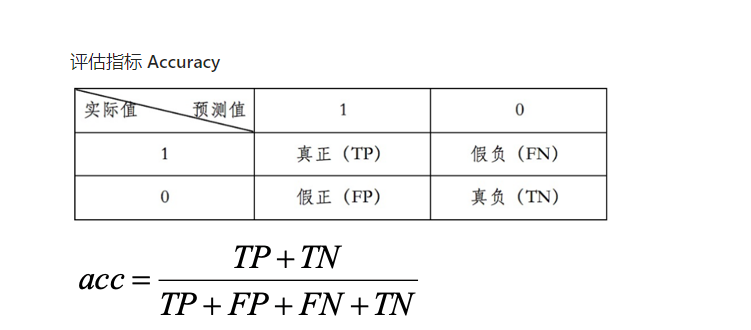

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score  # 用 acc 评估指标

# 采用五折交叉验证 多个子模型训练
def xgb_model(clf,train_x,train_y,test):
    sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=2021) # 5 个训练模型
    mean_acc =0
    prob=[]
    for k,(train_index,val_index) in enumerate(sk.split(train_x,train_y)):
        # 训练集的特征和label
        train_x_real = train_x.iloc[train_index]
        train_y_real = train_y.iloc[train_index]
        # 验证机的特征和label
        val_x = train_x.iloc[val_index]
        val_y = train_y.iloc[val_index]
        # 训练
        clf = clf.fit(train_x_real,train_y_real)
        # 预测
        val_y_pred = clf.predict(val_x)
        acc_val = accuracy_score(val_y,val_y_pred) # 将实际值和预测值判断
        print('第{}个子模型 accuracy{}'.format(k+1,acc_val))
        mean_acc += acc_val/5
        # 对测试集进行概率预测 predict_proba
        test_y_pred = clf.predict_proba(test)
        prob.append(test_y_pred)
    print(mean_acc)
    mean_prob = sum(prob)/5
    return mean_prob

In [20]:
# 不同参数跑出来的结果不同，不同参数跑完结果可以保存下来
%%time
model2 = xgb.XGBClassifier(
    max_depth = 12,learning_rate = 0.05,n_estimators = 5000, # n_estimators=5000 树的个数
    objective = 'binary:logistic',tree_method = 'gpu_hist',
    subsample = 0.8,colsample_bytree = 0.8,
    min_child_samples = 3,eval_metric = 'auc',reg_lambda = 0.5
)
res2 = xgb_model(model2,features.drop(['osv','timestamp','fea_hash','fea1_hash'],axis=1),train['label'],test_features.drop(['osv','timestamp','fea_hash','fea1_hash'],axis=1))

[14:33:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.

第1个子模型 accuracy0.88432
[14:38:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.

第2个子模型 accuracy0.88278
[14:46:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.

第3个子模型 accuracy0.88414
[14:54:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.

第4个子模型 accuracy0.88206
[15:01:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

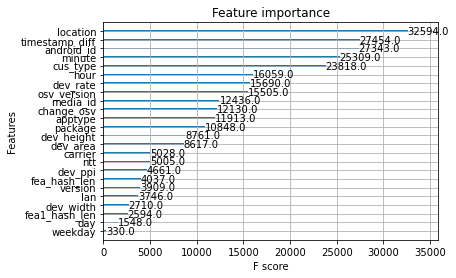

In [35]:
model
from xgboost import plot_importance
plot_importance(model)

In [60]:
result = [x[1] for x in res2] 
result = [1 if x>=0.5 else 0 for x in result] # 因为求出来的是概率
res = pd.DataFrame(test['sid'])
res['label'] = result
res.to_csv('./baseline6.csv',index = False)
res   # 88.78 由上面也可以看出这个子模型不太好

,sid,label
0,1440682,0
1,1606824,1
2,1774642,0
3,1742535,0
4,1689686,1
...,...,...
149995,1165373,1
149996,1444115,1
149997,1134378,1
149998,1700238,1


In [22]:
# 试一下融合两个模型
result_xgb = model_xgb.predict_proba(test_features.drop(['osv','timestamp','fea_hash','fea1_hash'],axis=1))
result_xgb

array([[0.9252368 , 0.07476316],
       [0.1063925 , 0.8936075 ],
       [0.96918625, 0.03081374],
       ...,
       [0.06678605, 0.93321395],
       [0.0331555 , 0.9668445 ],
       [0.04439896, 0.95560104]], dtype=float32)

In [24]:
result_proba = [x[1] for x in result_xgb] 
res = pd.DataFrame(test['sid'])
res['label'] = result_proba
res.to_csv('./baseline_xgb_5000_proba.csv',index = False)
res

,sid,label
0,1440682,0.074763
1,1606824,0.893607
2,1774642,0.030814
3,1742535,0.043493
4,1689686,0.948923
...,...,...
149995,1165373,0.939575
149996,1444115,0.978757
149997,1134378,0.933214
149998,1700238,0.966844
